In [1]:
# Import Libraries
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import pandas_ml as pdml
import sklearn.datasets as datasets
import xgboost as xgb

In [2]:
# load data
dataset = (".\data\Wine data red and white.csv")
df = pd.read_csv(dataset)

In [3]:
# Load data into pandas_ml 
df = pdml.ModelFrame(datasets.load_digits())

In [4]:
# Show input & target matrix
df.head()

,.target,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
# Check for target
df.has_target()

True

In [6]:
# Run Classifier function
df.xgboost.XGBClassifier

xgboost.sklearn.XGBClassifier

In [7]:
# Run Regressor function
df.xgboost.XGBRegressor

xgboost.sklearn.XGBRegressor

In [8]:
# Spit train and testing data
train_df, test_df = df.model_selection.train_test_split()

In [9]:
# Length of testing data
len(test_df)

450

In [10]:
# Call Classifier function as estimator
estimator = df.xgboost.XGBClassifier()

In [11]:
# Fit the training data
train_df.fit(estimator)
XGBClassifier(base_score=0.5, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, nthread=-1, objective='multi:softprob', seed=0,
       silent=True, subsample=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=-1, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=1)

In [12]:
# Predict Target based on trained dataset
train_predicted = train_df.predict(estimator)
train_predicted

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


968     6
1439    4
1742    2
184     2
93      1
1140    2
909     4
36      0
1287    0
696     2
67      6
535     9
64      4
561     3
1513    3
1085    6
864     6
510     4
368     7
1097    1
250     4
274     8
840     4
228     4
1374    4
192     3
10      0
1174    7
1309    2
1785    7
       ..
1173    6
1005    6
770     4
1512    4
1440    5
1170    3
1692    5
1143    2
1193    0
1689    2
208     0
502     2
540     4
903     8
643     8
911     6
1217    3
353     4
283     7
1201    7
751     9
1036    7
628     7
1537    8
601     1
992     3
795     9
914     9
1777    4
955     8
Length: 1347, dtype: int32

In [13]:
# Show predictions on testing data
predicted = test_df.predict(estimator)
predicted

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


664     8
1276    9
1340    8
835     3
980     0
2       2
969     6
327     5
312     1
225     4
150     0
732     7
1114    4
302     5
357     0
1514    1
965     3
768     8
310     2
771     9
1679    2
442     1
1621    1
1455    8
764     7
1648    1
1619    8
1247    1
1298    1
1026    8
       ..
1572    9
834     6
1372    1
1188    9
79      0
742     8
599     3
1073    7
423     9
1227    1
1130    3
455     9
318     3
610     7
515     8
1381    7
568     7
567     2
1274    5
716     1
1413    0
1723    1
575     3
28      8
214     2
1067    8
282     6
1761    7
1224    6
476     1
Length: 450, dtype: int32

In [14]:
# Show the Confusion Matrix
test_df.metrics.confusion_matrix()

Predicted,0,1,2,3,4,5,6,7,8,9
Target,,,,,,,,,,
0,39,0,0,0,0,2,0,0,0,0
1,0,53,0,0,0,0,0,0,0,0
2,0,1,45,0,0,0,1,0,0,0
3,0,0,0,33,0,1,0,1,0,0
4,0,0,0,0,38,0,0,0,0,2
5,0,0,0,0,0,50,0,0,0,0
6,0,0,0,0,0,0,49,0,0,0
7,0,0,0,0,0,0,0,42,0,0
8,0,4,0,1,0,0,0,0,43,0


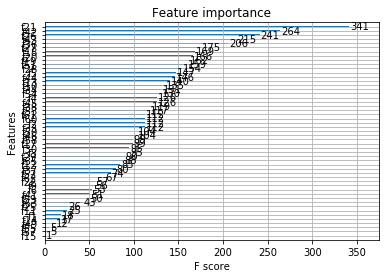

In [15]:
train_df.xgboost.plot_importance()
# importance plot will be displayed

In [16]:
# Fine tune the parameters for the XGBoost model
tuned_parameters = [{'max_depth': [3, 4]}]
cv = df.model_selection.GridSearchCV(df.xgb.XGBClassifier(), tuned_parameters, cv=5)

df.fit(cv)
df.model_selection.describe(cv)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.749272,0.177289,0.024402,2.870830e-03,3,{'max_depth': 3},0.934066,0.875691,0.952646,0.946779,...,0.918197,0.032828,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,5.312904,0.035654,0.024001,1.168008e-07,4,{'max_depth': 4},0.934066,0.883978,0.944290,0.943978,...,0.919310,0.026631,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [17]:
# Convert predicted values into a dataframe
predicted_df = pd.DataFrame(data=predicted)
predicted_df.head()

,0
664,8
1276,9
1340,8
835,3
980,0


In [18]:
# Export file as a CSV, without the Pandas index, but with the header
predicted_df.to_csv("output/fileOne.csv", index=False, header=True)

In [19]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt(".\data\Wine data red and white_test.csv", delimiter=",")
# dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:11]
Y = dataset[:,12]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 55.99%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [20]:
from sklearn.metrics import confusion_matrix
y_actu = y_test
confusion_matrix(y_actu, y_pred)

array([[  0,   0,   4,   6,   1,   0,   0],
       [  0,   3,  48,  21,   1,   0,   0],
       [  2,   1, 459, 240,   5,   0,   0],
       [  0,   4, 219, 649,  42,   1,   0],
       [  0,   0,  23, 259,  84,   0,   0],
       [  0,   0,   1,  46,  19,   6,   0],
       [  0,   0,   0,   0,   1,   0,   0]], dtype=int64)

In [21]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_pred, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1. 1. 1. 1. 1. 1.]
recall: [1. 1. 1. 1. 1. 1.]
fscore: [1. 1. 1. 1. 1. 1.]
support: [   2    8  754 1221  153    7]


In [22]:
from sklearn.metrics import precision_score
print("Macro average Precision Score:")
precision_score(y_test, y_pred, average='macro')

Macro average Precision Score:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.41734961602391335

In [23]:
#Calculated the averages globally******
print("Micro Average Precision Score:")
precision_score(y_test, y_pred, average='micro')

Micro Average Precision Score:


0.5599067599067599

In [24]:
# Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 
print("Weighted Average Precision Score:")
precision_score(y_test, y_pred, average='weighted')

Weighted Average Precision Score:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5625969266669844

In [25]:
print("No Averaging Precision Score:")
precision_score(y_test, y_pred, average=None)

No Averaging Precision Score:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.375     , 0.60875332, 0.53153153, 0.54901961,
       0.85714286, 0.        ])

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')  

0.5599067599067599

In [27]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')  

0.24463558614508454